<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/An%C3%A1lise_1900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - BIUD




Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [ ]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTgIlNGL41rbylTXGoMVPT5fq-DiMwDxkUDsbeCia9EUJjNJa5-1xVZBIQqVj0F4ep3ww1aOvqZp3lp/pub?output=csv'

In [ ]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,date,customer_id,total_value,nfe,business_id
0,77983070,2023-12-02 21:21:50.000,NaN,145.39,car57a2ee8j5ljnbpq66d6h5oi42d,4106
1,77983068,2023-12-02 22:51:23.000,8516568.0,117.00,car1b31hals5aq6tcqpbgcdobp3td,4106
2,81162004,2023-12-05 20:04:06.000,8558655.0,121.00,car7tft0mm5q2m9rrermfvj83el6i,4106
3,81168977,2023-12-04 21:07:11.000,8545726.0,140.80,car1ebf5a4016a545fb819902e4b98fe950,4100
4,81168991,2023-12-04 20:10:04.000,NaN,228.50,car3gda5fve94e0dbjenp5hes9bps,4100
5,81168989,2023-12-04 22:20:18.000,NaN,145.77,car6m383f53pk264nboel7fqovgqp,4100
6,81162006,2023-12-05 22:32:46.000,NaN,645.23,car4o582seubhuu07gkg0mdgeoic0,4106
7,81162061,2023-12-05 23:19:43.000,9526547.0,181.87,carcdd6c12e58fe47758893125f6fa5381b,4106
8,81168995,2023-12-04 19:10:08.000,NaN,184.75,car30kol1c2k4hvbq20g0k4b3cgs5,4100
9,78036723,2023-12-04 21:38:59.000,9191469.0,3401.06,car1g9rqjicqrikv48ujpq6jhhitm,4106


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(537481, 6)

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537481 entries, 0 to 537480
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           537481 non-null  int64  
 1   date         537481 non-null  object 
 2   customer_id  398295 non-null  float64
 3   total_value  537481 non-null  float64
 4   nfe          537481 non-null  object 
 5   business_id  537481 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 24.6+ MB


Inicialmente, podemos observar que existem 537.481 entradas e 6 atributos. Além disso, podemos identifcar que nenhum atributo tem valores nulos, excetos as vendas sem o CPF na nota, portanto, sem client_id, que soma 398.295.

In [ ]:
# Verifica a distribuição de vendas unidade
dataset.groupby('business_id').size()

business_id
4100    99436
4101    31928
4102    17766
4103    21445
4104    47611
4105    66099
4106    47507
4107    54046
4108    62084
4109    52898
4110    36661
dtype: int64

Com essa análise, podemos observar que a unidade que mais tem vendas é 4100 - indicando uma movimentação de vendas bem acima da média. De outro modo, a unidade 4103 é a que tem menor movimentação.

O código abaixo exibe as estatísticas descritivas do dataset de vendas.

In [ ]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,customer_id,total_value,business_id
count,5.374810e+05,3.982950e+05,537481.000000,537481.000000
mean,7.652027e+07,8.616937e+06,182.523736,4104.940569
std,4.797131e+06,2.680829e+05,164.956650,3.305722
min,7.208797e+07,8.506736e+06,-1871.500000,4100.000000
25%,7.295107e+07,8.514241e+06,117.670000,4102.000000
50%,7.398295e+07,8.538602e+06,141.250000,4105.000000
75%,7.821599e+07,8.588903e+06,226.500000,4108.000000
max,8.932215e+07,1.038714e+07,16100.240000,4110.000000


A partir dessa análise, já podemos observar que o ticket médio por venda é de R$182,52 reais por venda. Além diss, a venda com maior valor total é de mais de R$16 mil reais. Além disso, temos vendas com valor negativo, observado no valor mínimo.

Agora, vamos exibir o gráfico boxplot para entender como está distribuído o atributo Total_valeu, com o objetivo de identificar se existe alguma venda com valor negativo.

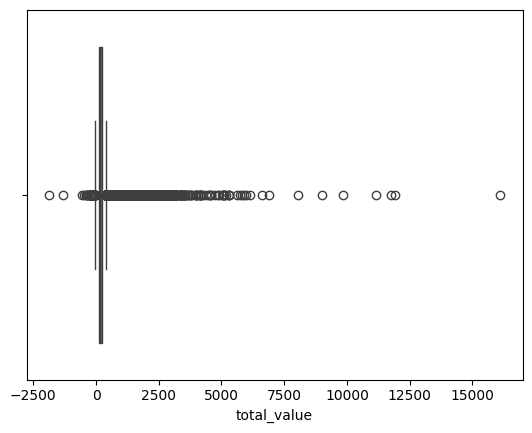

In [ ]:
# boxplot com seaborn de Total_valeu
sns.boxplot(x=dataset['total_value']);

O gráfico acima indica que existem alguns problemas com o atributo 'total_valeu'. Nele, podemos identificar que existem vendas negativas e algumas vendas com o valor que se destaca - acima de 3 desvios padrão. Agora, vamos verificar os nulls do dataset original.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

id                  0
date                0
customer_id    139186
total_value         0
nfe                 0
business_id         0
dtype: int64

Aqui, podemos observar que existem 139.186 compras sem CPF na nota, ou seja, sem estarem vinculadas à customer_id.

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

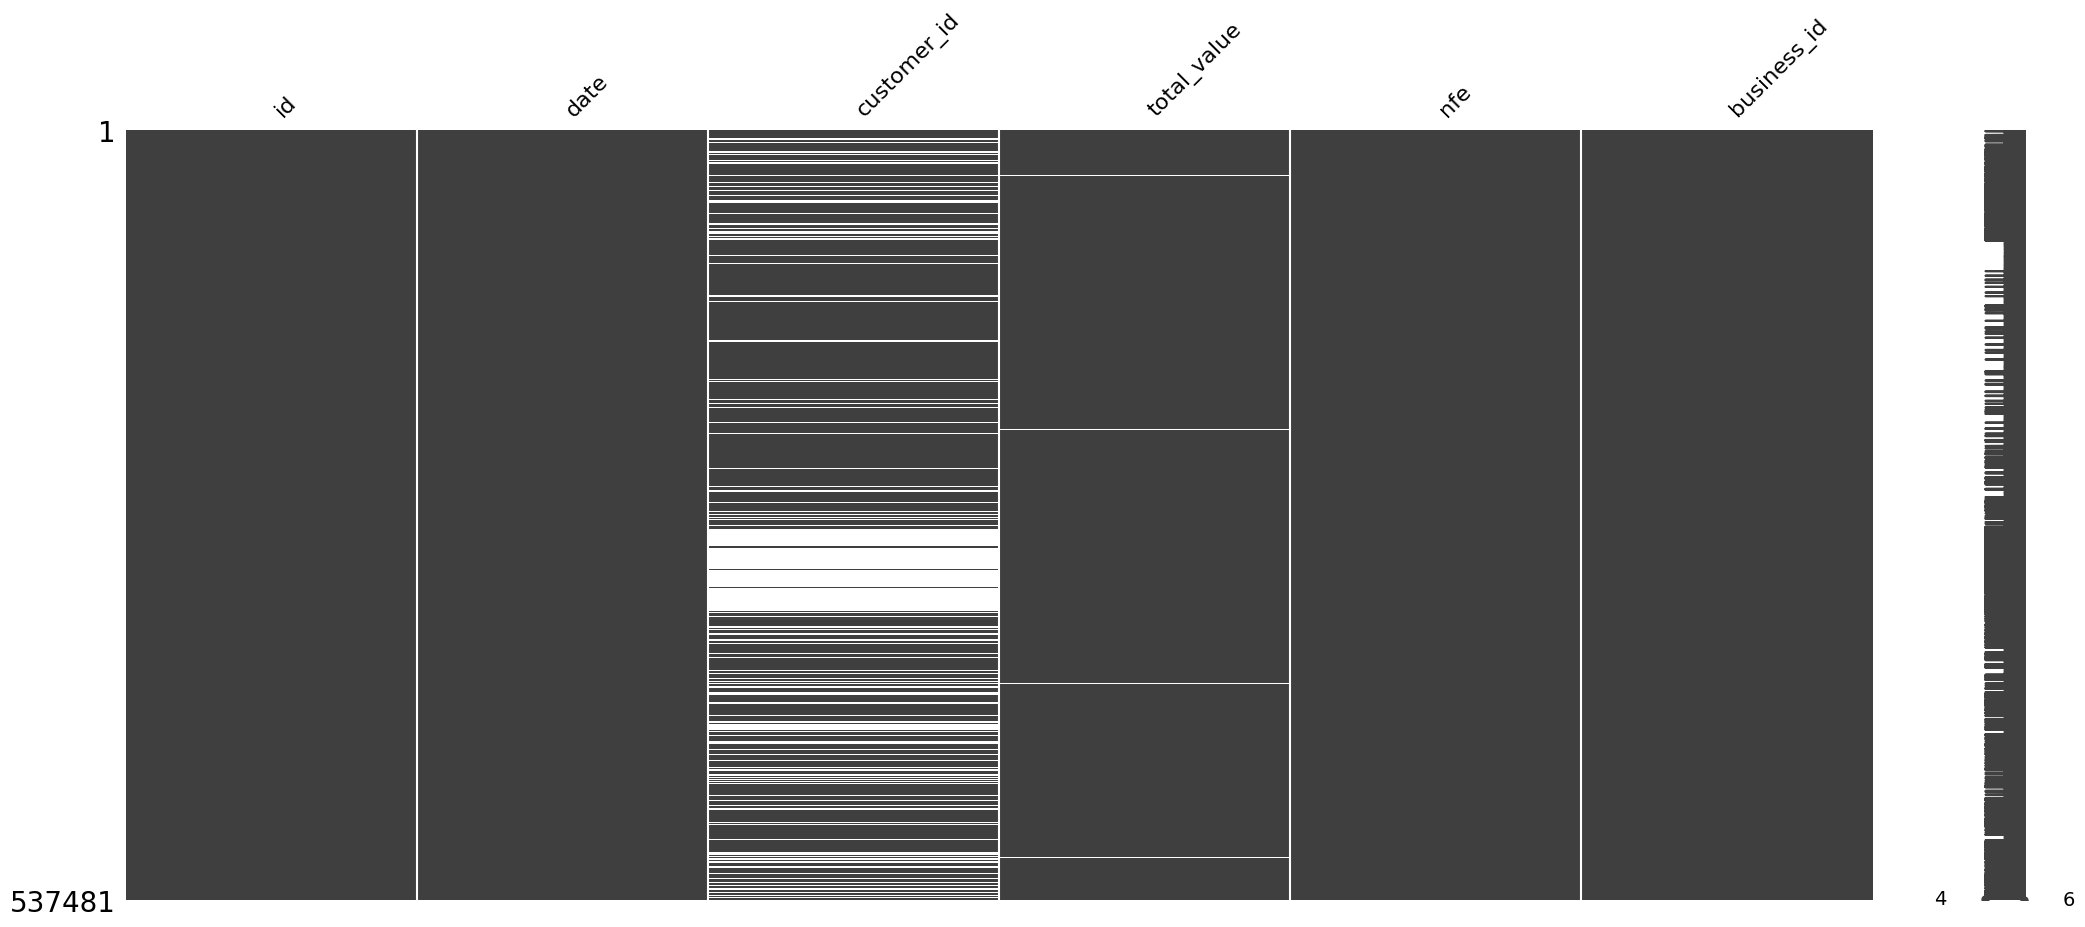

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [ ]:
# verificando nulls no dataset
crek.isnull().sum()

id                  0
date                0
customer_id    139186
total_value      5297
nfe                 0
business_id         0
dtype: int64

Com esse novo dataset, vamos verificar como se comportam as novas estatísticas descritvas.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
crek.describe()

,id,customer_id,total_value,business_id
count,5.374810e+05,3.982950e+05,532184.000000,537481.000000
mean,7.652027e+07,8.616937e+06,184.340454,4104.940569
std,4.797131e+06,2.680829e+05,164.762369,3.305722
min,7.208797e+07,8.506736e+06,-1871.500000,4100.000000
25%,7.295107e+07,8.514241e+06,118.080000,4102.000000
50%,7.398295e+07,8.538602e+06,141.800000,4105.000000
75%,7.821599e+07,8.588903e+06,227.450000,4108.000000
max,8.932215e+07,1.038714e+07,16100.240000,4110.000000


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

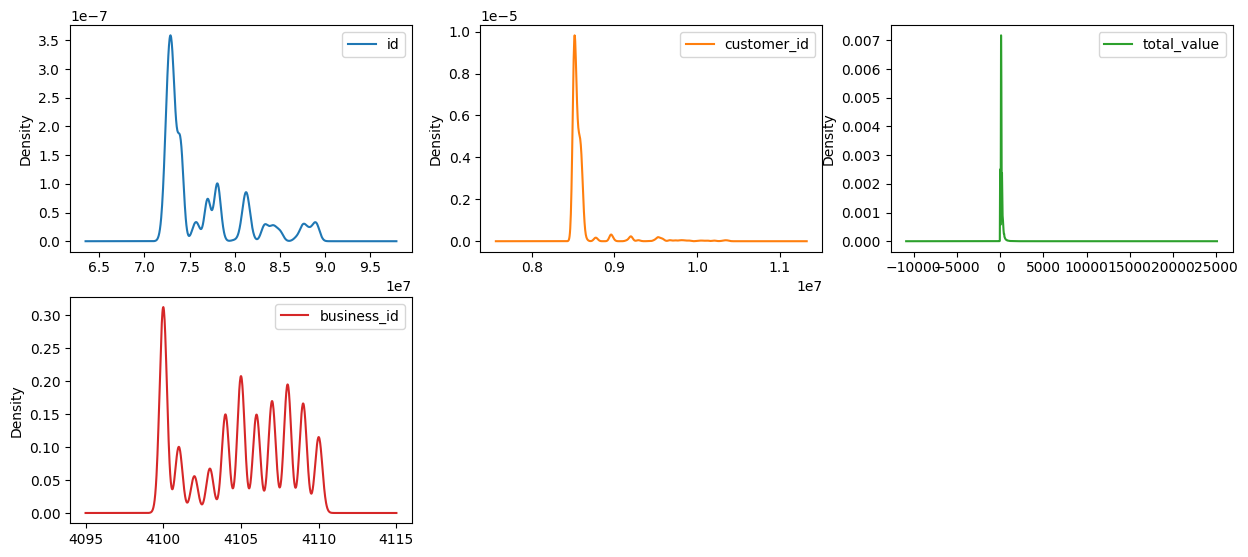

In [ ]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

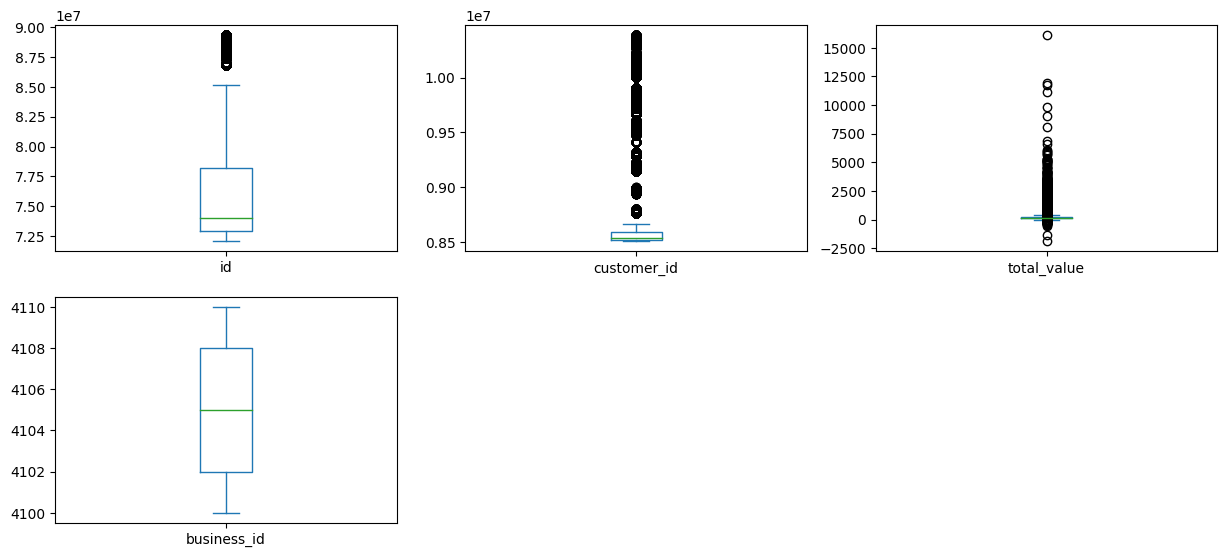

In [ ]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir do gráfico de desindade, temos uma outra visualização no problema de vendas negativas do dataset. Além disso, algumas vendas se destacam, mostrando que pode haver erros para cima também.


# Visualização histórica de dados

Nessa seção, o nosso objetivo é identificar se existe algum período em que a evolução do total_valeu (valor total nas vendas) tem algum período que se destaca.
Para isso, iremos usar a biblioteca do Seaborn.

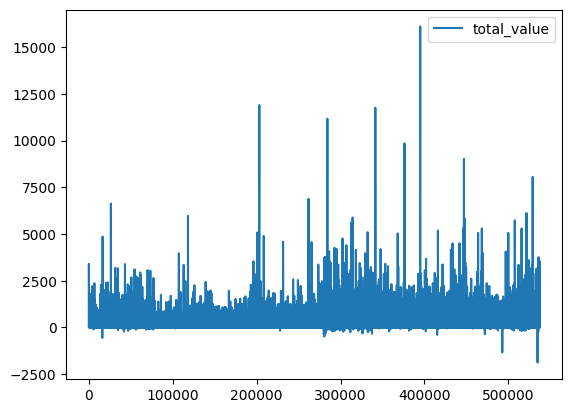

In [ ]:
# gráfico de linhas com Seaborn
sns.lineplot(data=dataset.drop(['id','customer_id','business_id'], axis=1));

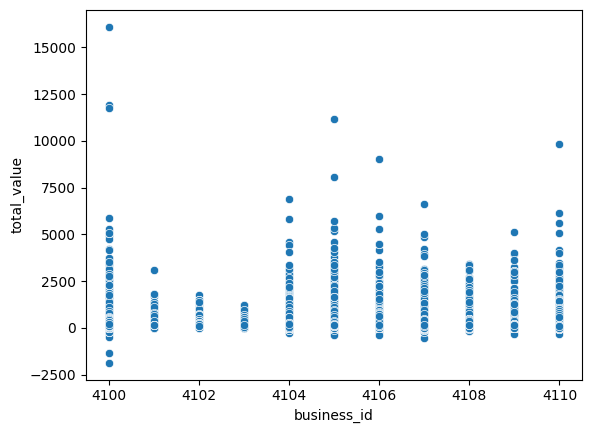

In [ ]:
# scatter plot com Seaborn
sns.scatterplot(x='business_id', y='total_value', data=dataset);

A partir dos gráficos acima, podemos observar que existem venda com valor acima do normal esperado, indicando haver problemas de outlier. Além disso, identificamos, também, que a unidade que mais indicam problemas desse tipo (em escala), é a unidade 4100.